In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Introduction:In this project, we aim to leverage machine learning techniques to develop a robust credit scoring model for a banking institution. The primary objective is to empower the bank with data-driven insights, enabling more informed lending decisions. Credit scoring plays a pivotal role in assessing the creditworthiness of loan applicants, and our focus is on building a predictive model that enhances the accuracy and efficiency of this process.

This Project aims to count the Creditworthiness of a certain group of interested borrowers.Banks and Credit Card Companies calculate Credit scores to determine creditworthiness. it helps banks and credit card companies immediately to issueloans to customerwith creditworthiness.Today banks and credit card companies use machine learning algorithms to classify all the customers in their database based on their credit history.

Scope:The scope of this project encompasses the development and implementation of a credit scoring model that predicts the likelihood of loans being classified as 'good' or 'bad'.

# IMPORTING THE DEPENDENCES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer,classification_report,roc_curve, auc

# Data Collection

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/machine learning /a_Dataset_CreditScoring.xlsx")

# EDA (Exploratory data analysis)

In [ ]:
#Inspecting first few rows of the data
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [ ]:
#Inspecting last few rows of the data
df.tail()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
2995,0,126441,0,0,0,2,0.0,2,199,10,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,126448,0,0,0,0,NaN,0,270,3,...,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,126465,1,1,0,8,0.0,5,234,4,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,126487,4,4,0,2,3.0,1,257,3,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000
2999,0,126503,2,1,1,0,18.0,0,254,119,...,1.0,0.3239,0.1667,0,2,4,0.5000,3,2,0.0000


In [ ]:
#Inspecting the random samples of 5 rows from the data
df.sample(n=5)

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
1953,0,73973,2,2,0,1,1.0,2,105,10,...,3.0,0.7795,0.3000,2,1,3,0.4000,1,2,0.7500
1164,0,32037,1,0,0,2,2.0,1,78,78,...,0.0,0.0000,0.4000,0,0,1,0.0000,0,0,0.0000
1586,0,53670,2,1,1,25,1.0,33,149,2,...,22.0,0.9377,0.2308,3,1,5,0.6410,2,3,0.7600
1281,0,38262,0,0,0,5,2.0,3,333,7,...,4.0,0.6670,0.9167,0,0,0,1.0000,0,0,0.6667
1380,0,43409,1,0,0,0,8.0,0,249,5,...,11.0,0.8439,0.8636,0,0,0,0.6818,1,0,0.4000


In [ ]:
 #Inspecting the number of rows and columns
df.shape

(3000, 30)

In [ ]:
# inspecting the name of the columns
df.columns

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [ ]:
#getting the informarion about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [ ]:
# getting overall statistics about the dataset
df.describe()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,62922.683667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,37203.691912,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,...,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30376.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,...,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,62872.500000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,...,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,96156.500000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,...,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,126503.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [ ]:
#Inspecting the missing values in the columns
df.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

# Visualisation

<Axes: xlabel='InqTimeLast', ylabel='Count'>

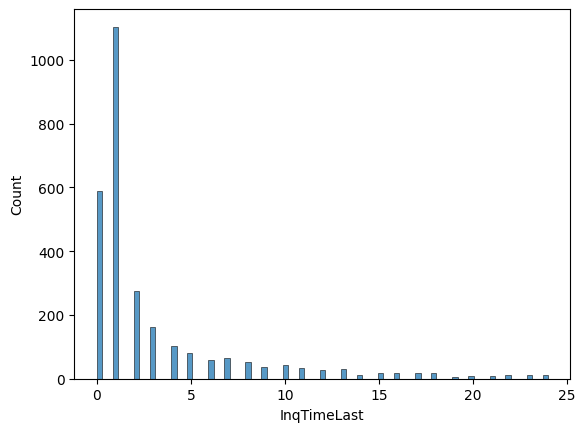

In [ ]:
# Plotting a histogram to visualize the distribution of the time since the last inquiry (InqTimeLast) in the dataset.
sns.histplot(df["InqTimeLast"])

<Axes: xlabel='TLSum', ylabel='Count'>

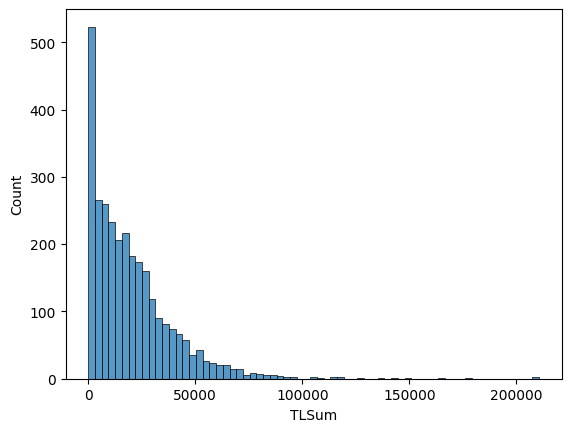

In [ ]:
# Visualizing the distribution of the total loan sum (TLSum) in the dataset using a histogram.
sns.histplot(df["TLSum"])

<Axes: xlabel='TLMaxSum', ylabel='Count'>

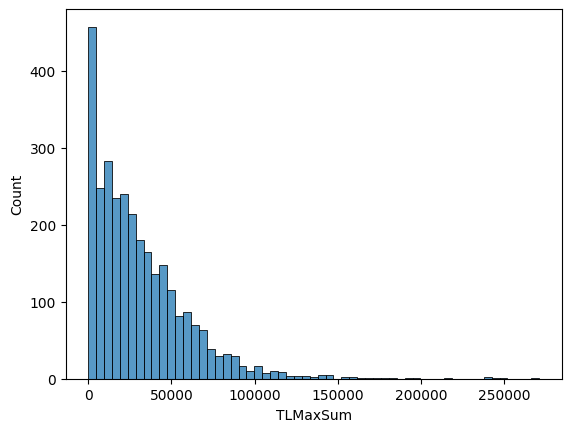

In [ ]:
# Visualizing the distribution of the maximum loan sum per individual (TLMaxSum) in the dataset using a histogram.
sns.histplot(df["TLMaxSum"])

<Axes: xlabel='TLSatCnt', ylabel='Count'>

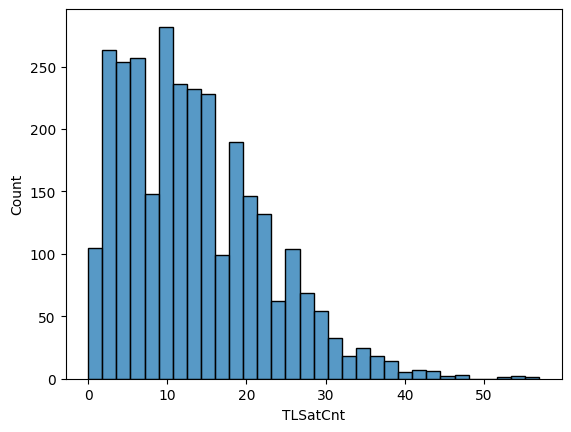

In [ ]:
# Visualizing the distribution of the count of satisfied loans (TLSatCnt) in the dataset using a histogram.
sns.histplot(df["TLSatCnt"])

<Axes: xlabel='TL75UtilCnt', ylabel='Count'>

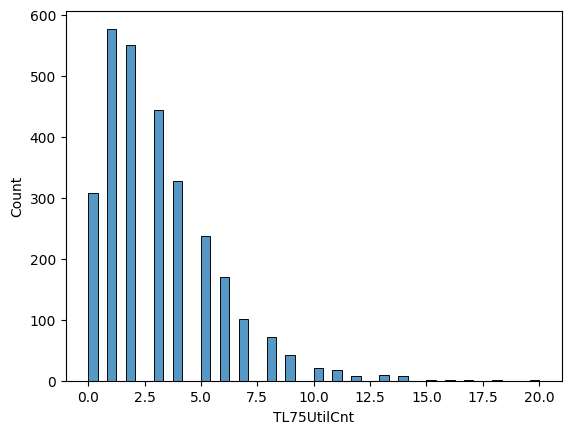

In [ ]:
# Visualizing the distribution of the count of loans with 75% or higher utilization (TL75UtilCnt) in the dataset using a histogram.
sns.histplot(df["TL75UtilCnt"])

<Axes: xlabel='TL50UtilCnt', ylabel='Count'>

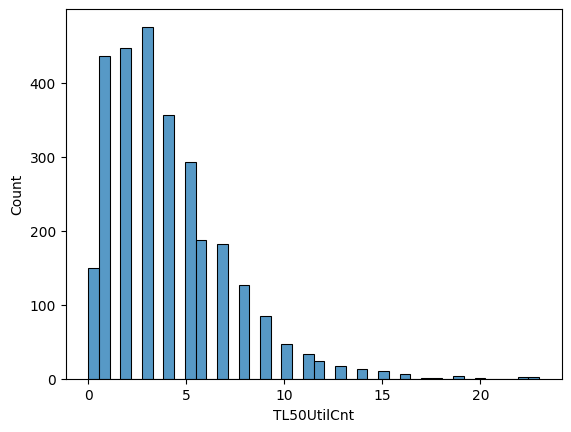

In [ ]:
# Visualizing the distribution of the count of loans with 50% or higher utilization (TL50UtilCnt) in the dataset using a histogram.
sns.histplot(df["TL50UtilCnt"])

<Axes: xlabel='TLBalHCPct', ylabel='Count'>

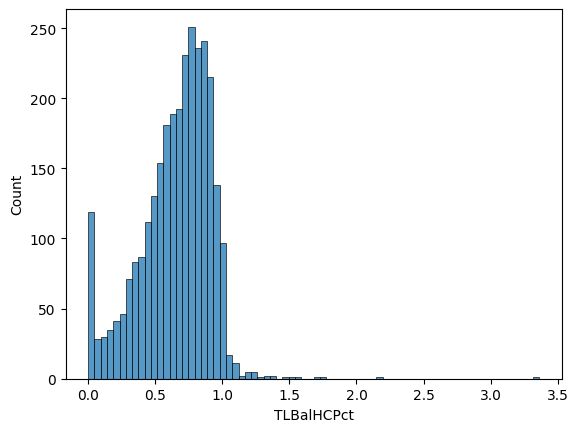

In [ ]:
# Visualizing the distribution of the percentage of total loan balances held by high-credit individuals (TLBalHCPct) in the dataset using a histogram.
sns.histplot(df["TLBalHCPct"])

<Axes: xlabel='TLSatPct', ylabel='Count'>

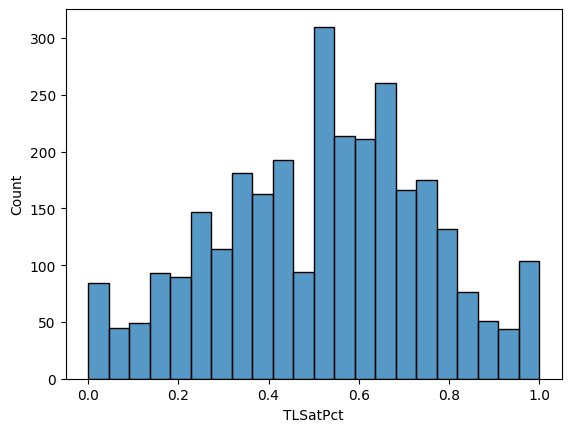

In [ ]:
# Visualizing the distribution of the percentage of satisfied loans (TLSatPct) in the dataset using a histogram.
sns.histplot(df["TLSatPct"])

<Axes: xlabel='TLOpenPct', ylabel='Count'>

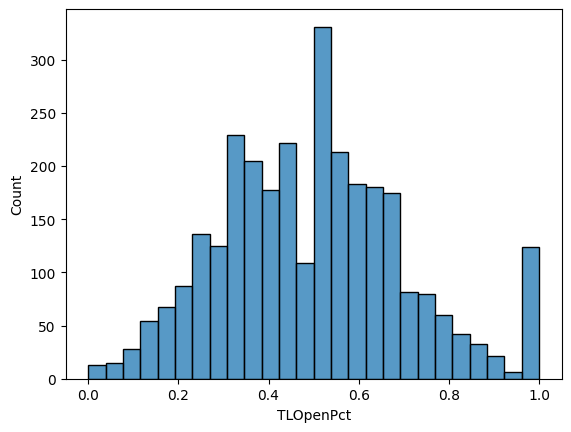

In [ ]:
# Visualizing the distribution of the percentage of open loans (TLOpenPct) in the dataset using a histogram.
sns.histplot(df["TLOpenPct"])

<Axes: xlabel='TLOpen24Pct', ylabel='Count'>

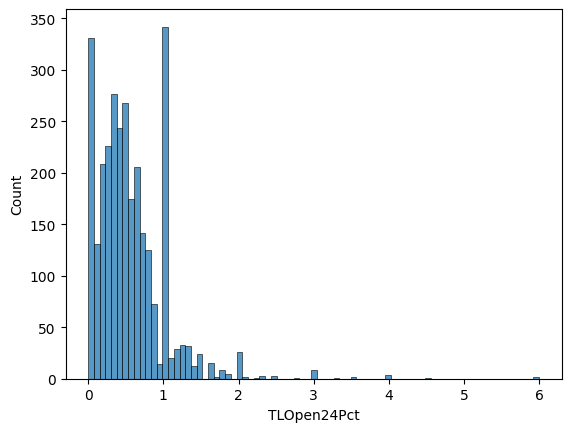

In [ ]:
# Visualizing the distribution of the percentage of loans open in the last 24 months (TLOpen24Pct) in the dataset using a histogram.
sns.histplot(df["TLOpen24Pct"])

<Axes: >

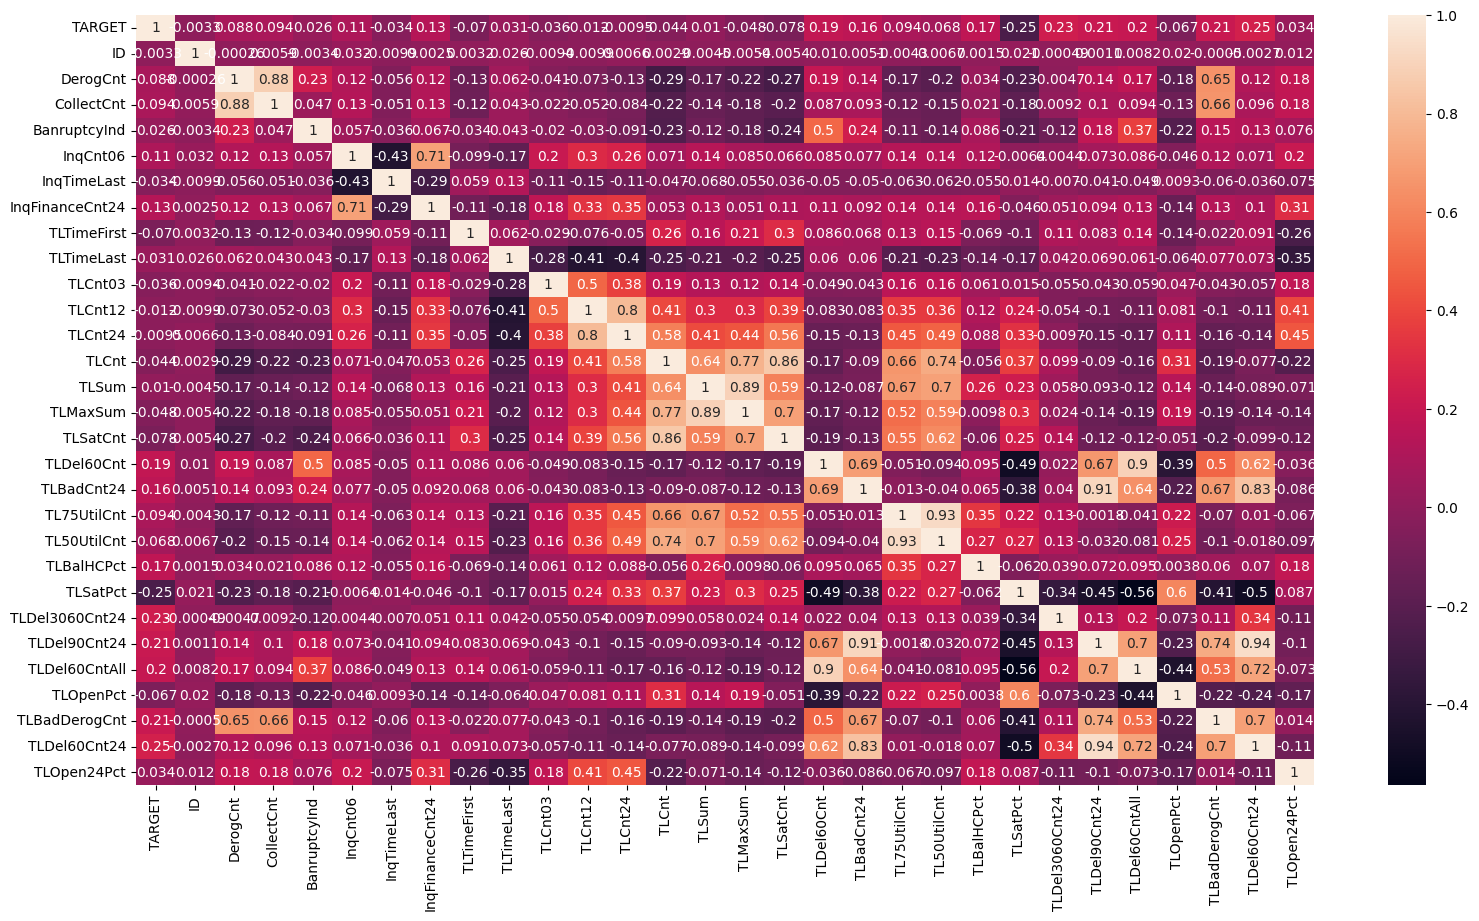

In [ ]:
# Creating a heatmap to visualize the correlation matrix of the dataset.
# The heatmap illustrates the pairwise correlations between different variables, with values ranging from -1 to 1.
plt.figure(figsize = (19,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)

# PREPROCESSING

#filling the missing values of the column


In [ ]:
df["InqTimeLast"]=df["InqTimeLast"].fillna(df["InqTimeLast"].median())

In [ ]:
df["TLCnt"]=df["TLCnt"].fillna(df["TLCnt"].median())

In [ ]:
df["TLSum"]=df["TLSum"].fillna(df["TLSum"].median())

In [ ]:
df["TLMaxSum"]=df["TLMaxSum"].fillna(df["TLMaxSum"].median())

In [ ]:
df["TLSatCnt"]=df["TLSatCnt"].fillna(df["TLSatCnt"].median())

In [ ]:
df["TLBalHCPct"]=df["TLBalHCPct"].fillna(df["TLBalHCPct"].median())

In [ ]:
df["TLSatPct"]=df["TLSatPct"].fillna(df["TLSatPct"].mean())

In [ ]:
df["TL75UtilCnt"]=df["TL75UtilCnt"].fillna(df["TL75UtilCnt"].median())

In [ ]:
df["TL50UtilCnt"]=df["TL50UtilCnt"].fillna(df["TL50UtilCnt"].median())

In [ ]:
df["TLOpenPct"]=df["TLOpenPct"].fillna(df["TLOpenPct"].mean())

In [ ]:
df["TLOpen24Pct"]=df["TLOpen24Pct"].fillna(df["TLOpen24Pct"].median())

In [ ]:
#inspecting again after filling the missing values
df.isna().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [ ]:
#Dropping the customer ID from the data
df.drop("ID",axis=1,inplace=True)

In [ ]:
df.shape

(3000, 29)

# Splitting the data into X and y


In [ ]:
X=df.drop(['TARGET'],axis=1) #Depenedent
y=df["TARGET"] # Indepenedent
# count of good loans (0) and bad loans (1)

In [ ]:
y.value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [ ]:
#the data is imbalance
(500/3000)*100

16.666666666666664

# Train and Test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [ ]:
numeric_columns=['CollectCnt', 'DerogCnt', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct']

In [ ]:
# Standardizing features using StandardScaler to transform the training and test sets.
# Standardization ensures that the features have a mean of 0 and a standard deviation of 1, bringing them to a common scale.
sc = StandardScaler()
X_train[numeric_columns]=sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]=sc.transform(X_test[numeric_columns])

In [ ]:
X_train

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
1578,-0.546640,-0.422284,0,0.542785,0.252515,-0.134062,0.404788,-0.479422,-0.465094,0.629558,...,1.944781,0.658872,-0.466199,1.921954,-0.505731,-0.439290,0.227117,-0.601669,-0.038582,0.032004
1817,0.990035,1.573742,0,0.542785,-0.658132,0.087528,0.087224,-0.109807,-0.465094,-0.426304,...,-0.353012,-2.432479,-0.789366,1.071375,0.735961,0.142872,-2.007983,1.543955,1.063758,5.031776
175,0.221697,0.575729,0,1.121112,-0.430470,1.860251,-0.378536,-0.417819,-0.465094,1.685420,...,-0.681268,1.176667,0.085488,-0.629783,0.735961,-0.148209,-1.667060,0.685706,0.512588,7.100619
2677,0.990035,1.573742,0,0.253621,-0.430470,0.309119,-1.077176,-0.417819,-0.465094,-0.426304,...,-0.353012,1.130039,-0.078654,1.071375,-0.505731,-0.439290,0.813215,-0.172544,-0.038582,-0.140331
311,1.374204,2.072748,0,1.988604,-0.658132,0.530709,0.013126,0.321411,-0.465094,-0.954235,...,1.944781,0.614500,-1.905955,1.921954,6.944423,4.800176,0.179727,5.406078,6.575457,-0.898976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,-0.546640,-0.422284,0,0.253621,-0.202809,-0.577243,0.436544,-0.602627,1.312335,0.101627,...,-1.009524,0.421596,-1.708985,1.921954,1.356808,1.016117,-1.272943,0.685706,2.717268,-0.140331
1458,-0.546640,-0.422284,0,-0.324707,-0.658132,-0.355653,-0.113900,-0.356217,-0.465094,0.101627,...,-0.353012,0.094449,-1.195243,1.921954,0.115115,0.142872,-1.259403,-0.172544,-0.038582,0.066553
244,-0.162471,-0.422284,1,-0.035543,-0.430470,1.417071,-0.685514,0.013399,-0.465094,-0.426304,...,-0.024756,1.187572,-1.499651,-0.629783,1.356808,2.180443,-1.067423,0.685706,1.063758,-0.347215
922,-0.546640,-0.422284,0,0.253621,-0.430470,0.973890,0.711766,-0.109807,-0.465094,-0.426304,...,-0.353012,0.309163,-0.180123,1.921954,-0.505731,-0.148209,-0.568369,-0.601669,-0.038582,0.376880


In [ ]:
X_test

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
1939,-0.546640,-0.422284,0,-0.903034,1.618484,-0.798833,1.844410,-0.233012,-0.465094,1.685420,...,-1.009524,-1.583401,0.799183,-0.629783,-0.505731,-0.730372,0.433605,-0.601669,-0.589752,0.066553
204,-0.546640,-0.422284,0,0.831948,-0.430470,0.309119,0.584741,-0.541024,1.312335,2.213351,...,1.616525,0.949920,-0.442750,1.921954,-0.505731,-0.148209,-0.641390,-0.601669,-0.038582,0.066553
2388,-0.546640,-0.422284,0,0.831948,-0.430470,-0.134062,-0.844296,-0.664229,1.312335,1.685420,...,-0.024756,-0.188702,0.789804,-0.629783,-0.505731,-0.730372,-0.440705,-0.601669,-0.589752,0.329917
1721,-0.546640,-0.422284,0,-0.324707,-0.430470,-0.577243,1.272795,-0.356217,-0.465094,0.101627,...,-0.024756,0.002698,1.155605,-0.629783,-0.505731,-0.730372,-0.120092,-0.601669,-0.589752,-0.255359
788,0.221697,0.575729,0,-0.903034,1.390823,-0.798833,-0.717271,-0.171409,-0.465094,-0.426304,...,-0.353012,0.286601,0.548495,1.071375,-0.505731,-0.439290,-0.419427,-0.172544,-0.038582,0.007384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,-0.546640,-0.422284,0,0.253621,-0.430470,-0.577243,-0.844296,-0.602627,1.312335,-0.426304,...,0.631756,0.780330,-1.047729,1.921954,0.115115,0.433954,0.666690,-0.172544,1.063758,-0.879115
1244,-0.546640,-0.422284,0,-0.613871,-0.430470,-0.577243,1.156355,0.136604,-0.465094,-0.954235,...,-0.024756,-0.823818,-0.078654,1.921954,-0.505731,0.142872,0.813215,-0.601669,0.512588,-0.312666
858,-0.162471,0.076722,0,-0.035543,-0.658132,-0.134062,0.859963,1.861474,-0.465094,-0.954235,...,-0.024756,0.878850,0.115331,-0.629783,0.115115,1.598280,-1.092085,-0.172544,-0.038582,-1.174752
516,-0.546640,-0.422284,0,-0.903034,-0.430470,-0.798833,0.552984,0.383014,-0.465094,-0.954235,...,-0.024756,0.925478,0.225754,1.921954,-0.505731,0.725035,-0.338186,-0.601669,0.512588,-0.829876


In [ ]:
# Applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the target variable.
os=SMOTE(random_state=123)

In [ ]:
# Resampling the training data to create synthetic samples for the minority class
X_train,y_train=os.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    2000
1    2000
Name: TARGET, dtype: int64

# Model Selection

In [ ]:
#loading the LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr.predict (X_test)

In [ ]:
lr_accuracy_score=accuracy_score(y_pred_lr,y_test)
lr_accuracy_score

0.755

In [ ]:
confusion_matrix(y_pred_lr,y_test)

array([[385,  32],
       [115,  68]])

In [ ]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       417
           1       0.68      0.37      0.48       183

    accuracy                           0.76       600
   macro avg       0.73      0.65      0.66       600
weighted avg       0.74      0.76      0.73       600



support vector machine

In [ ]:
#loading the Support Vector Machine
SV=SVC()

In [ ]:
SV.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_sv=SV.predict(X_test)

In [ ]:
svm_accuracy_score=accuracy_score(y_pred_sv,y_test)

In [ ]:
svm_accuracy_score

0.765

In [ ]:
confusion_matrix(y_pred_sv,y_test)

array([[400,  41],
       [100,  59]])

In [ ]:
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       441
           1       0.59      0.37      0.46       159

    accuracy                           0.77       600
   macro avg       0.70      0.64      0.65       600
weighted avg       0.74      0.77      0.75       600



Random Forest Classifier

In [ ]:
# loading the random forest
rf=RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[469,  31],
       [ 74,  26]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       500
           1       0.46      0.26      0.33       100

    accuracy                           0.82       600
   macro avg       0.66      0.60      0.62       600
weighted avg       0.80      0.82      0.80       600



In [ ]:
random_accuracy_score=accuracy_score(y_pred_rf,y_test)

In [ ]:
random_accuracy_score

0.825

In [ ]:
#Hyperparameter Tuning
rf_param ={'n_estimators':[10,20,30,40,50],'bootstrap':[True,False]}

In [ ]:
#GridSearchCV
gsc=GridSearchCV(estimator=rf,
                 param_grid=rf_param,
                 scoring='accuracy')

In [ ]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
gsc.best_params_

{'bootstrap': False, 'n_estimators': 30}

In [ ]:
gsc.best_score_

0.9177500000000001

In [ ]:
tuned_rf_model = gsc.best_estimator_
tuned_predictions = tuned_rf_model.predict(X_test)
tuned_accuracy_rf= accuracy_score(y_test, tuned_predictions)

In [ ]:
tuned_accuracy_rf

0.8366666666666667

In [ ]:
#RandomizedSearchCV
rsc=RandomizedSearchCV(estimator=rf,param_distributions=rf_param,scoring='accuracy',n_iter=3)

In [ ]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   scoring='accuracy')

In [ ]:
rsc.best_params_

{'n_estimators': 50, 'bootstrap': False}

In [ ]:
rsc.best_score_

0.9164999999999999

In [ ]:
tuned_rf_model_random = rsc.best_estimator_
tuned_predictions_random = tuned_rf_model_random.predict(X_test)
tuned_accuracy_random_rf = accuracy_score(y_test, tuned_predictions_random)

In [ ]:
tuned_accuracy_random_rf

0.8166666666666667

In [ ]:
tuned_classification_random_rf=classification_report(y_test, tuned_predictions_random)

In [ ]:
print(tuned_classification_random_rf)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       500
           1       0.39      0.17      0.24       100

    accuracy                           0.82       600
   macro avg       0.62      0.56      0.57       600
weighted avg       0.77      0.82      0.79       600



Decision Tree Classifier

In [ ]:
# loading the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
y_pred_clf=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_clf)

array([[420,  80],
       [ 63,  37]])

In [ ]:
clf_accuracy_score=accuracy_score(y_pred_clf,y_test)

In [ ]:
clf_accuracy_score

0.7616666666666667

In [ ]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       500
           1       0.32      0.37      0.34       100

    accuracy                           0.76       600
   macro avg       0.59      0.60      0.60       600
weighted avg       0.78      0.76      0.77       600



GradientBoostingClassifier

In [ ]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=123)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
y_pred_gbc=gbc.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_gbc)

array([[468,  32],
       [ 67,  33]])

In [ ]:
gbc_accuracy_score=accuracy_score(y_pred_gbc,y_test)

In [ ]:
gbc_accuracy_score

0.835

In [ ]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       500
           1       0.51      0.33      0.40       100

    accuracy                           0.83       600
   macro avg       0.69      0.63      0.65       600
weighted avg       0.81      0.83      0.82       600



In [ ]:
#HyperparameterTuning
gbc_param={'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
       'max_depth':[3,4,5,6,8,10,12,15],
       'n_estimators':[10,20]
       }


In [ ]:
gsc=GridSearchCV(estimator=gbc,param_grid=gbc_param,scoring='accuracy',cv=10,n_jobs=1)

In [ ]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'n_estimators': [10, 20]},
             scoring='accuracy')

In [ ]:
gsc.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 20}

In [ ]:
gsc.best_score_

0.8995000000000001

In [ ]:
tuned_gbc_model = gsc.best_estimator_
tuned_predictions = tuned_gbc_model.predict(X_test)
tuned_accuracy_gbc = accuracy_score(y_test, tuned_predictions)

In [ ]:
tuned_accuracy_gbc

0.8166666666666667

In [ ]:
#RandomizedSearchCV
rsc=RandomizedSearchCV(estimator=gbc,param_distributions=gbc_param,scoring='accuracy',n_iter=3)


In [ ]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=123),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'n_estimators': [10, 20]},
                   scoring='accuracy')

In [ ]:
rsc.best_params_

{'n_estimators': 20, 'max_depth': 4, 'learning_rate': 0.3}

In [ ]:
rsc.best_score_

0.8595

In [ ]:
tuned_gbc_model_random = rsc.best_estimator_
tuned_predictions_random = tuned_gbc_model_random.predict(X_test)
tuned_accuracy_random_gbc= accuracy_score(y_test, tuned_predictions_random)

In [ ]:
tuned_classification_random_gbc=(classification_report(y_test, tuned_predictions_random))

In [ ]:
print(tuned_classification_random_gbc)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       500
           1       0.46      0.33      0.39       100

    accuracy                           0.82       600
   macro avg       0.67      0.63      0.64       600
weighted avg       0.81      0.82      0.81       600



In [ ]:
tuned_accuracy_random_gbc

0.825

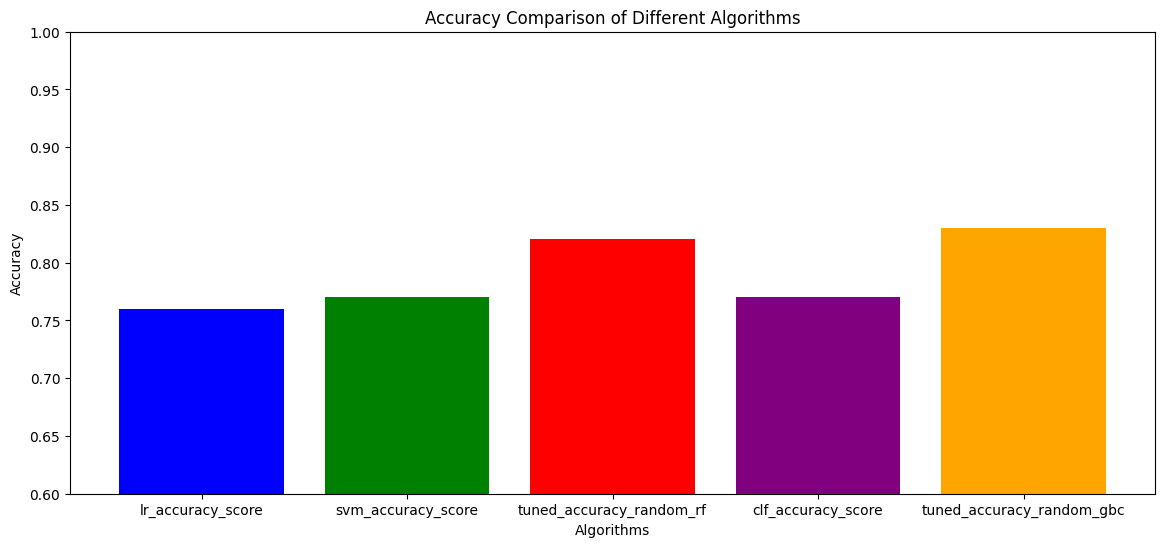

In [ ]:
# Comparing the accuracy of different machine learning algorithms using a bar chart.
# Each bar represents the accuracy score achieved by a specific algorithm on a given dataset.
algorithms = ['lr_accuracy_score', 'svm_accuracy_score', 'tuned_accuracy_random_rf', 'clf_accuracy_score', 'tuned_accuracy_random_gbc']
accuracy_scores = [0.76, 0.77, 0.82, 0.77, 0.83]
plt.figure(figsize=(14, 6))
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Accuracy Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

# Cross Validation

In [ ]:
#Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(tuned_rf_model_random, X_train, y_train, cv=cv, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.92125 0.92625 0.90625 0.9325  0.915  ]
Random Forest Mean Accuracy: 0.92025


In [ ]:
# Cross-Validation for Gradient Boosting Classifier
gbc_cv_scores = cross_val_score(tuned_gbc_model_random, X_train, y_train, cv=cv, scoring='accuracy')
print("Gradient Boosting Cross-Validation Scores:", gbc_cv_scores)
print("Gradient Boosting Mean Accuracy:", gbc_cv_scores.mean())

Gradient Boosting Cross-Validation Scores: [0.89125 0.8925  0.885   0.9     0.8725 ]
Gradient Boosting Mean Accuracy: 0.88825


The best accuracy is getting from the Random Forest .We are getting Mean Accuracy of 0.921

# Threshold Selection with (AUC-ROC)

In [ ]:
test_probabilities = tuned_rf_model_random.predict_proba(X_test)[:, 1]

In [ ]:
 #Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)

In [ ]:
thresholds

array([1.78, 0.78, 0.76, 0.72, 0.7 , 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54,
       0.52, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32,
       0.3 , 0.28, 0.26, 0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 ,
       0.08, 0.06, 0.04, 0.02, 0.  ])

In [ ]:
# Find the Optimal Threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

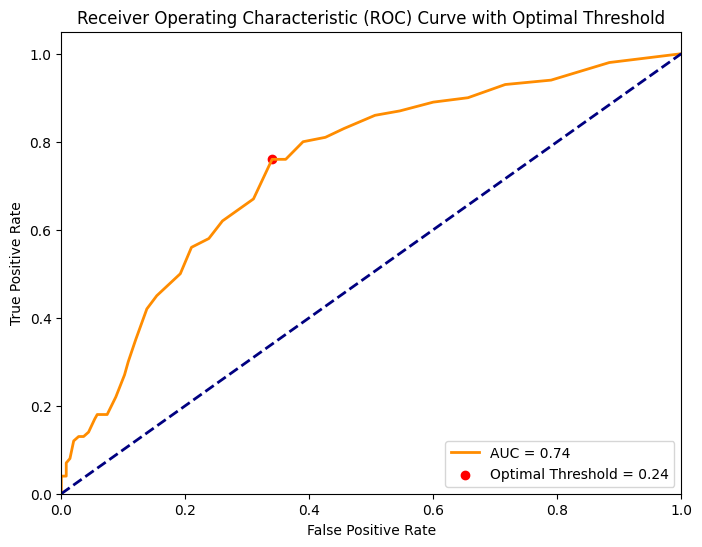

In [ ]:
# Plot the ROC Curve with Optimal Threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

An AUC of 0.74 indicates that our model has a moderate ability to distinguish between positive and negative instances.
It suggests that, on average, our model's predictions are more accurate than random chance.

In [ ]:
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.24


In [ ]:
tuned_rf_model_random = RandomForestClassifier()
tuned_rf_model_random.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
test_probabilities = tuned_rf_model_random.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_thresholded = (test_probabilities > 0.24).astype(int)

In [ ]:
y_pred_thresholded

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_thresholded)
precision

0.30434782608695654

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_thresholded)
recall

0.77

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_thresholded)
f1

0.43626062322946174

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_thresholded)
accuracy

0.6683333333333333

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)
roc_auc

0.76461